In [2]:
#Import libraries

#Analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Time
import datetime as dt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Get databases
import importlib
from functions_load_data import fun_open_cyrilic_files
from functions_clean_catalogs import fun_clean_categories
from functions_clean_catalogs import fun_split_category
from functions_clean_catalogs import fun_extract_shop_name_info
from functions_dates import fun_process_dates

import os
current_file_directory = os.path.dirname(os.path.abspath(__name__))
str_directory = "../data/"
lst_files = ["sales_train.csv", "item_categories.csv", "items.csv", "shops.csv"]

In [9]:
tbl_sales_complete = pd.read_csv("../data/Outputs/sales_train_complete.csv")
tbl_sales_complete.head()

,Unnamed: 0,date,date_block_num,item_price,item_cnt_day,shop_name,city,shop_type,item_name,group,category,month,year,year_month,sales_type
0,0,2013-01-02,0,999.000,1.000,"Ярославль ТЦ ""Альтаир""",Ярославль,ТЦ,ЯВЛЕНИЕ 2012 (BD),Кино,Blu-Ray,1,2013,2013.01.01,Sale
1,1,2013-01-03,0,899.000,1.000,"Москва ТРК ""Атриум""",Москва,ТРК,DEEP PURPLE The House Of Blue Light LP,Музыка,Винил,1,2013,2013.01.01,Sale
2,2,2013-01-05,0,899.000,-1.000,"Москва ТРК ""Атриум""",Москва,ТРК,DEEP PURPLE The House Of Blue Light LP,Музыка,Винил,1,2013,2013.01.01,Return
3,3,2013-01-06,0,1709.050,1.000,"Москва ТРК ""Атриум""",Москва,ТРК,DEEP PURPLE Who Do You Think We Are LP,Музыка,Винил,1,2013,2013.01.01,Sale
4,4,2013-01-15,0,1099.000,1.000,"Москва ТРК ""Атриум""",Москва,ТРК,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка,CD фирменного производства,1,2013,2013.01.01,Sale


In [ ]:
# Initial analysis by total sales


tbl_total_sales_by_month = tbl_sales_complete.groupby(
    by =["year_month"], as_index = False
    ).agg(
        {"item_cnt_day": "sum"}
    )

tbl_total_sales_by_month.year_month = pd.to_datetime(tbl_total_sales_by_month.year_month, format='%Y.%m.%d')
tbl_total_sales_by_month = tbl_total_sales_by_month.set_index(pd.DatetimeIndex(tbl_sales_complete_by_month.year_month))

tbl_total_sales_by_month = tbl_total_sales_by_month.drop("year_month", axis = 1)

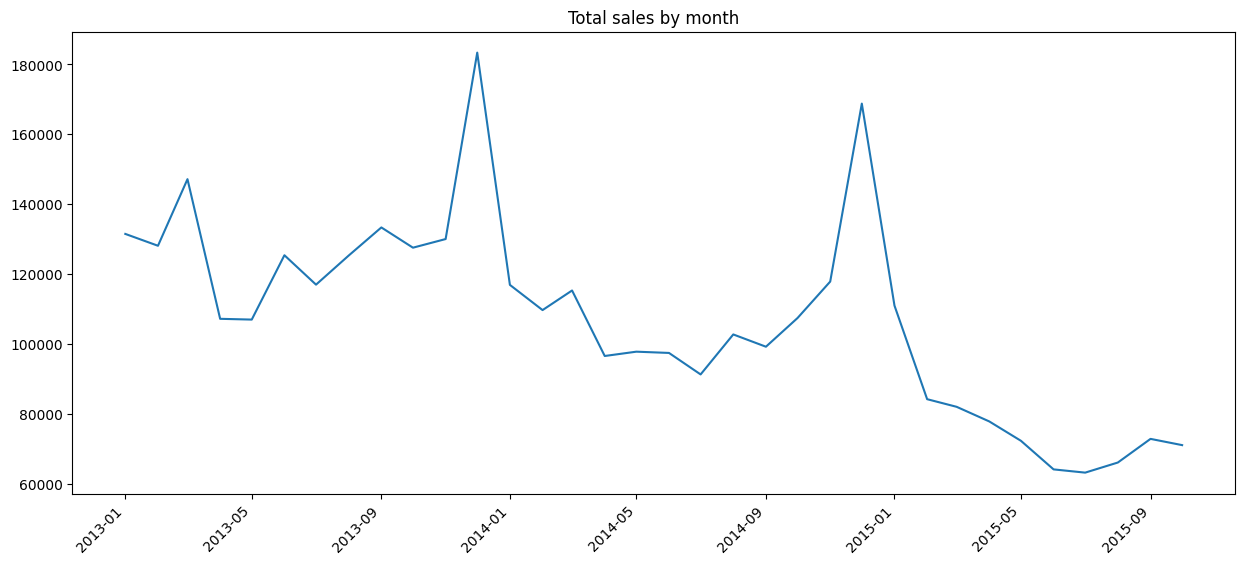

In [12]:
plt.figure(figsize=(15, 6))

plt.plot(tbl_total_sales_by_month.item_cnt_day)
plt.title("Total sales by month")
plt.xticks(rotation = 45, ha = "right")
plt.show()

In [13]:
tbl_sales_complete_by_month = tbl_sales_complete.groupby(
    by =["shop_name", "city", "shop_type", "item_name", "group", "category", "year", "month", "sales_type"], as_index = False
    ).agg(
        {"item_cnt_day": "sum"}
    )

tbl_sales_complete_by_month

,shop_name,city,shop_type,item_name,group,category,year,month,sales_type,item_cnt_day
0,"!Якутск ТЦ ""Центральный"" фран",!Якутск,ТЦ,"007 Legends [PS3, русская версия]",Игры,PS3,2013,1,Sale,1.000
1,"!Якутск ТЦ ""Центральный"" фран",!Якутск,ТЦ,"007 Legends [Xbox 360, русская версия]",Игры,XBOX 360,2013,1,Sale,1.000
2,"!Якутск ТЦ ""Центральный"" фран",!Якутск,ТЦ,007: КООРДИНАТЫ «СКАЙФОЛЛ»,Кино,DVD,2013,2,Sale,10.000
3,"!Якутск ТЦ ""Центральный"" фран",!Якутск,ТЦ,007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD),Кино,Blu-Ray,2013,2,Sale,4.000
4,"!Якутск ТЦ ""Центральный"" фран",!Якутск,ТЦ,1+1,Кино,DVD,2013,1,Sale,7.000
...,...,...,...,...,...,...,...,...,...,...
1426683,"Ярославль ТЦ ""Альтаир""",Ярославль,ТЦ,ЯРОСТЬ (BD),Кино,Blu-Ray,2015,4,Sale,2.000
1426684,"Ярославль ТЦ ""Альтаир""",Ярославль,ТЦ,ЯРОСТЬ (BD),Кино,Blu-Ray,2015,7,Sale,1.000
1426685,"Ярославль ТЦ ""Альтаир""",Ярославль,ТЦ,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,Книги,Методические материалы 1С,2013,10,Sale,1.000
1426686,"Ярославль ТЦ ""Альтаир""",Ярославль,ТЦ,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,Книги,Методические материалы 1С,2013,12,Sale,2.000


In [14]:
lst_items = tbl_sales_complete_by_month.item_name.unique()
lst_shops = tbl_sales_complete_by_month.shop_name.unique()

In [24]:
all_products = []

def fun_decomposition(item_name, shop_name):
    
    print(item_name)
    print(shop_name)

    try:
        print("filtering")        
        tbl_product_store = tbl_sales_complete_by_month.loc[(tbl_sales_complete_by_month.shop_name == shop_name) &
                                                        (tbl_sales_complete_by_month.item_name == item_name)]
        
        print(len(tbl_product_store))
        
        print("decomposition")
        #decomposition = sm.tsa.seasonal_decompose(tbl_product_store, model = "additive")
        
        print("Graph")
        #gph_decomposition = decomposition.plot()
        #gph_decomposition.set_size_inches((15, 10))

        #gph_decomposition.suptitle(f"Time Series Decomposition of {item_name} in {shop_name} Sales", fontsize=16, fontweight='bold', y=1.02)
        #gph_decomposition.axes[0].set_title("Observed", fontsize=14)
        #gph_decomposition.axes[1].set_title("Trend", fontsize=14)
        #gph_decomposition.axes[2].set_title("Seasonal", fontsize=14)
        #gph_decomposition.axes[3].set_title("Residual", fontsize=14)

        #plt.tight_layout()
        #plt.show()

    except:
        exit()

In [ ]:
l = lst_items
s = lst_shops

for item in l:
    tbl_shops_with_item_sales = tbl_sales_complete_by_month.loc[tbl_sales_complete_by_month.item_name == item]
    lst_shops = tbl_shops_with_item_sales.shop_name.unique()

    for shop in lst_shops:
        fun_decomposition(item, shop)

007 Legends [PS3, русская версия]
!Якутск ТЦ "Центральный" фран
filtering
1
decomposition
Graph
007 Legends [PS3, русская версия]
Адыгея ТЦ "Мега"
filtering
2
decomposition
Graph
007 Legends [PS3, русская версия]
Балашиха ТРК "Октябрь-Киномир"
filtering
1
decomposition
Graph
007 Legends [PS3, русская версия]
Волжский ТЦ "Волга Молл"
filtering
1
decomposition
Graph
007 Legends [PS3, русская версия]
Вологда ТРЦ "Мармелад"
filtering
2
decomposition
Graph
007 Legends [PS3, русская версия]
Воронеж ТРЦ "Максимир"
filtering
1
decomposition
Graph
007 Legends [PS3, русская версия]
Казань ТЦ "ПаркХаус" II
filtering
2
decomposition
Graph
007 Legends [PS3, русская версия]
Калуга ТРЦ "XXI век"
filtering
2
decomposition
Graph
007 Legends [PS3, русская версия]
Коломна ТЦ "Рио"
filtering
1
decomposition
Graph
007 Legends [PS3, русская версия]
Красноярск ТЦ "Взлетка Плаза"
filtering
1
decomposition
Graph
007 Legends [PS3, русская версия]
Красноярск ТЦ "Июнь"
filtering
1
decomposition
Graph
007 Legends 

In [18]:
tbl_sales_complete_by_month.loc[tbl_sales_complete_by_month.item_name == l]

,shop_name,city,shop_type,item_name,group,category,year,month,sales_type,item_cnt_day
1243146,"Химки ТЦ ""Мега""",Химки,ТЦ,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,Кино,DVD,2014,9,Sale,1.000


: 

In [ ]:
for shop in s:
    fun_decomposition(l, shop)

! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D
!Якутск Орджоникидзе, 56 фран
filtering
Empty DataFrame
Columns: [shop_name, city, shop_type, item_name, group, category, year, month, sales_type, item_cnt_day]
Index: []
decomposition
Graph
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D
!Якутск ТЦ "Центральный" фран
filtering
Empty DataFrame
Columns: [shop_name, city, shop_type, item_name, group, category, year, month, sales_type, item_cnt_day]
Index: []
decomposition
Graph
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D
Адыгея ТЦ "Мега"
filtering
Empty DataFrame
Columns: [shop_name, city, shop_type, item_name, group, category, year, month, sales_type, item_cnt_day]
Index: []
decomposition
Graph
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D
Балашиха ТРК "Октябрь-Киномир"
filtering
Empty DataFrame
Columns: [shop_name, city, shop_type, item_name, group, category, year, month, sales_type, item_cnt_day]
Index: []
decomposition
Graph
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D
Волжский ТЦ "Волга Молл"
filtering
Emp

: 

In [23]:
a

Exception

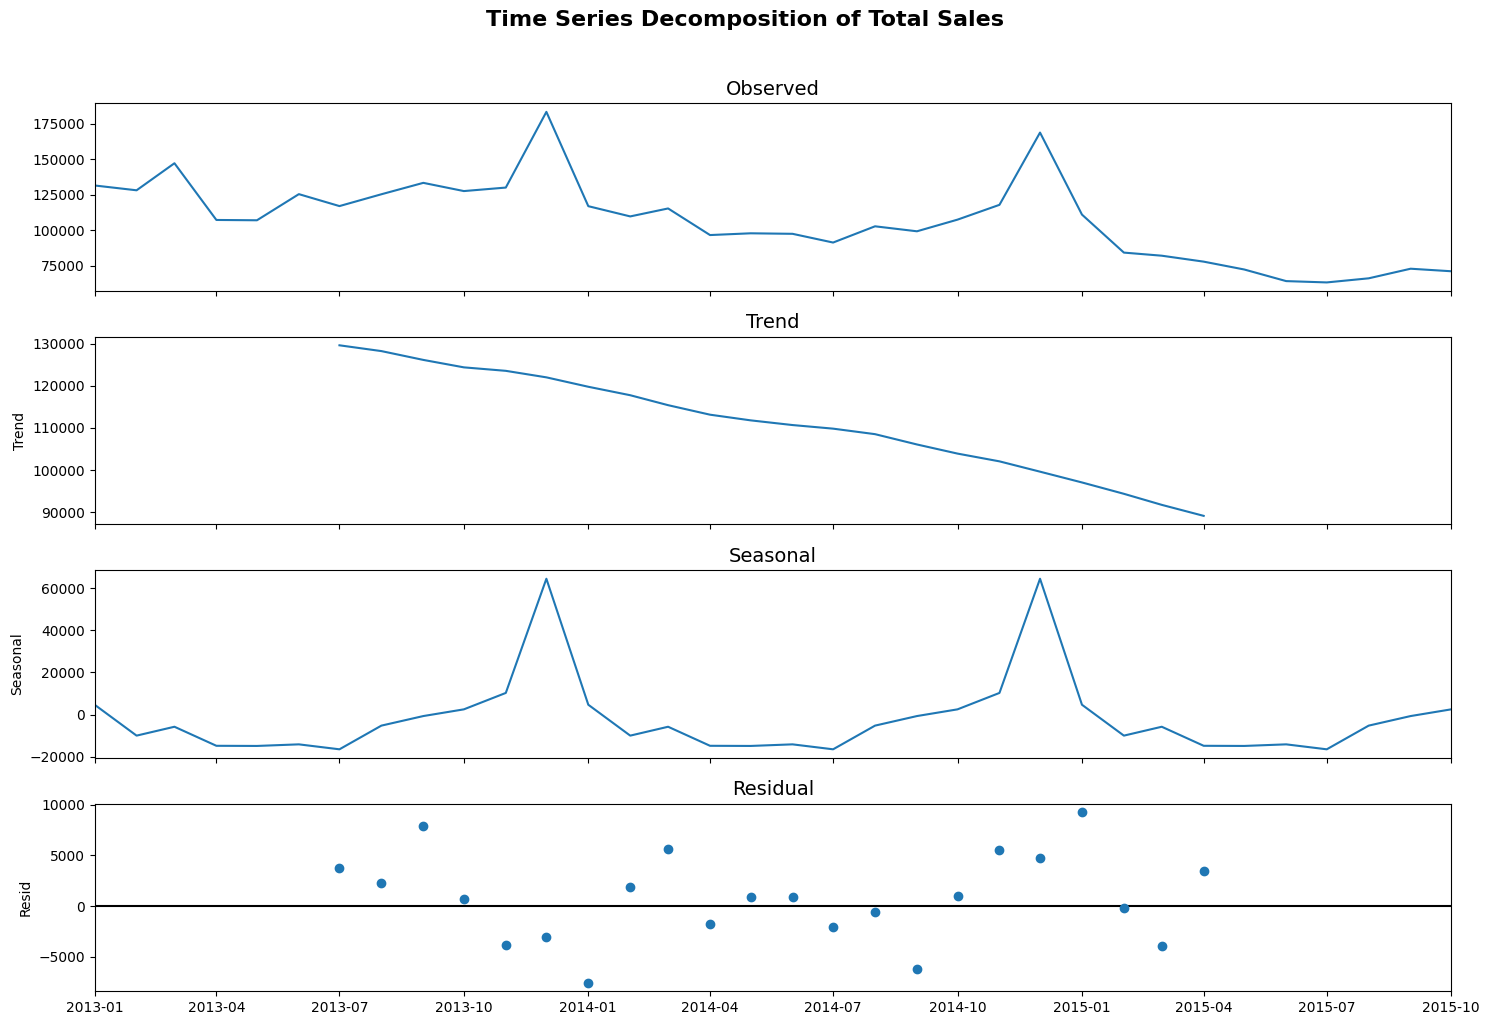

In [13]:
decomposition = sm.tsa.seasonal_decompose(tbl_total_sales_by_month, model = "additive")
gph_decomposition = decomposition.plot()
gph_decomposition.set_size_inches((15, 10))

gph_decomposition.suptitle("Time Series Decomposition of Total Sales", fontsize=16, fontweight='bold', y=1.02)
gph_decomposition.axes[0].set_title("Observed", fontsize=14)
gph_decomposition.axes[1].set_title("Trend", fontsize=14)
gph_decomposition.axes[2].set_title("Seasonal", fontsize=14)
gph_decomposition.axes[3].set_title("Residual", fontsize=14)

plt.tight_layout()
plt.show()

In [14]:
# MODEL FOR TOTAL SALES

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [15]:
tbl_ARIMA_results = pd.DataFrame(columns=["param", "param_seasonal", "aic_results"])
lst_results = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tbl_total_sales_by_month,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            dict_results = {"param": [param],
                            "param_seasonal": [param_seasonal], 
                            "aic_results": [results.aic]}
            
            lst_results.append(dict_results)
        except:
            continue

tbl_ARIMA_results = pd.DataFrame(lst_results)

C:\Users\v4qu1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\v4qu1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\v4qu1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\v4qu1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Local

In [16]:
# Get lowest AIC value for defining optimal option
tbl_ARIMA_results.loc[tbl_ARIMA_results.aic_results == tbl_ARIMA_results.aic_results.min()[0]]

,param,param_seasonal,aic_results
59,"[(1, 1, 1)]","[(0, 1, 1, 12)]",[144.22151132223507]


In [17]:
mod = sm.tsa.statespace.SARIMAX(tbl_total_sales_by_month,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\v4qu1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\v4qu1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\v4qu1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2031      4.651      0.044      0.965      -8.913       9.320
ma.L1         -0.1903      4.791     -0.040      0.968      -9.580       9.199
ma.S.L12      -0.0778      0.073     -1.063      0.288      -0.221       0.066
sigma2      9.765e+07   8.46e-08   1.15e+15      0.000    9.76e+07    9.76e+07


In [ ]:
residuals

In [18]:
results.save("longley_results.pickle")
obj = pd.read_pickle("longley_results.pickle")

In [19]:
obj

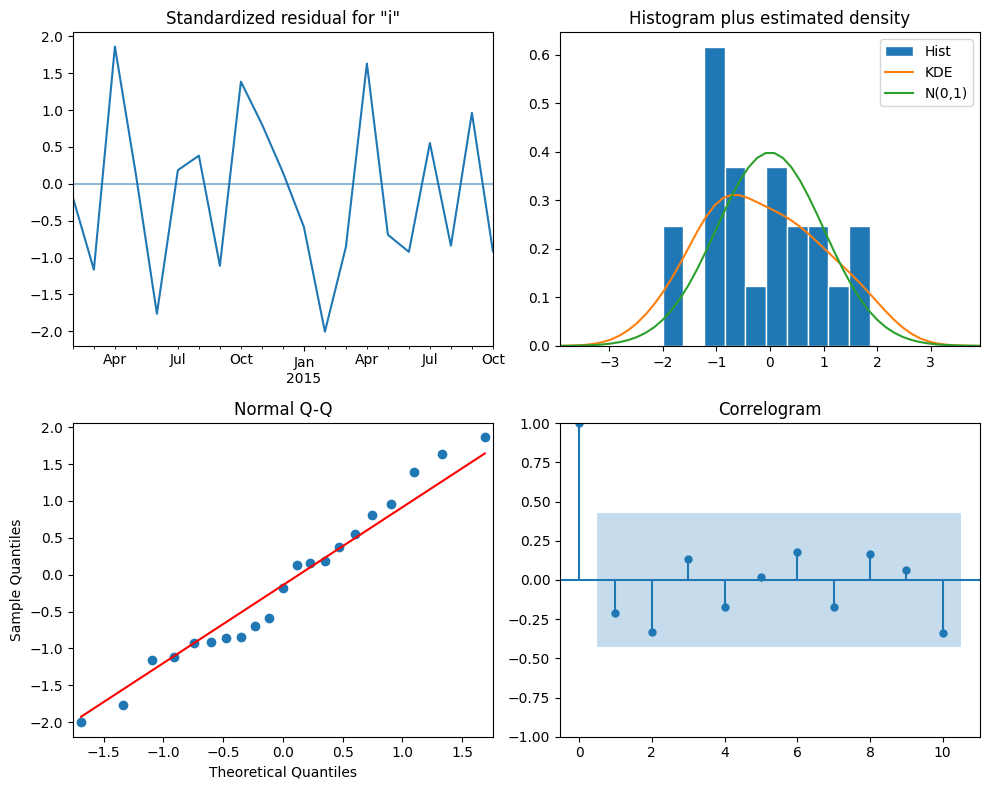

In [20]:
results.plot_diagnostics(figsize=(10, 8))
plt.tight_layout()
plt.show()

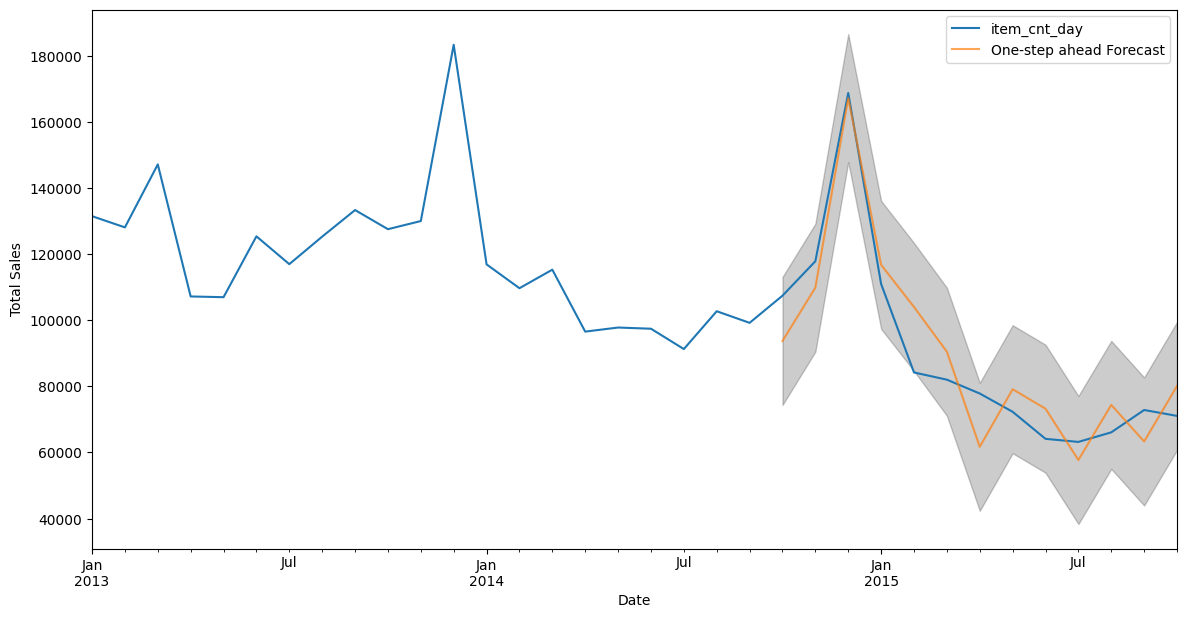

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2014-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = tbl_total_sales_by_month['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

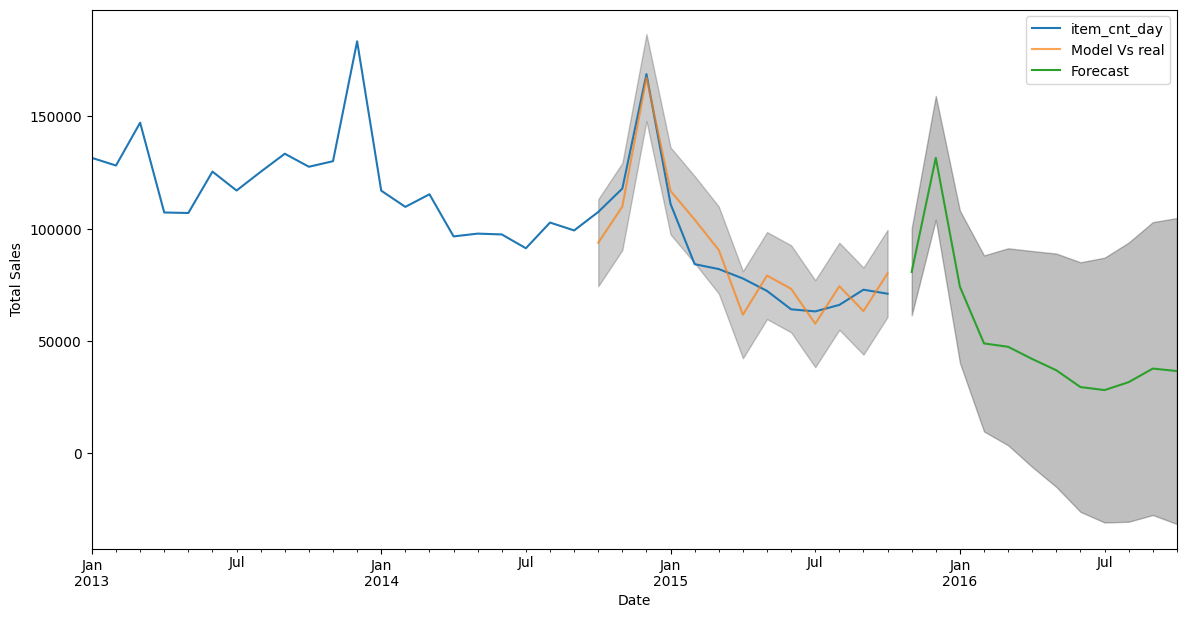

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2014-10-01'), dynamic=False)
pred_uc = results.get_forecast(steps = 12)

pred_ci = pred.conf_int()
pred_fcst_ci = pred_uc.conf_int()

ax = tbl_total_sales_by_month['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Model Vs real', alpha=.7, figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_fcst_ci.index,
                pred_fcst_ci.iloc[:, 0],
                pred_fcst_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
ax.set_xlim('2013-01-01', '2016-10-10')
plt.legend()
plt.show()

In [23]:
tbl_last_12m_sales = tbl_sales_complete_by_month.loc[
    ((tbl_sales_complete_by_month["year"] > 2014) & (tbl_sales_complete["month"] > 10)) |
    (tbl_sales_complete_by_month["year"] == 2015)]

KeyError: 'year'

9415

In [39]:
tbl_sales_complete_by_month = tbl_sales_complete.groupby(
    by =["shop_name", "city", "shop_type", "item_name", "group", "category", "year", "month", "sales_type"], as_index = False
    ).agg(
        {"item_cnt_day": "sum"}
    )

In [170]:
tbl_sales_item_by_month = tbl_sales_complete_by_month.groupby(
    by = ["item_name", "group", "category", "year", "month", "sales_type"], as_index = False
).agg(
    {"item_cnt_day": "sum"}
)

TypeError: plot() got an unexpected keyword argument 'x'

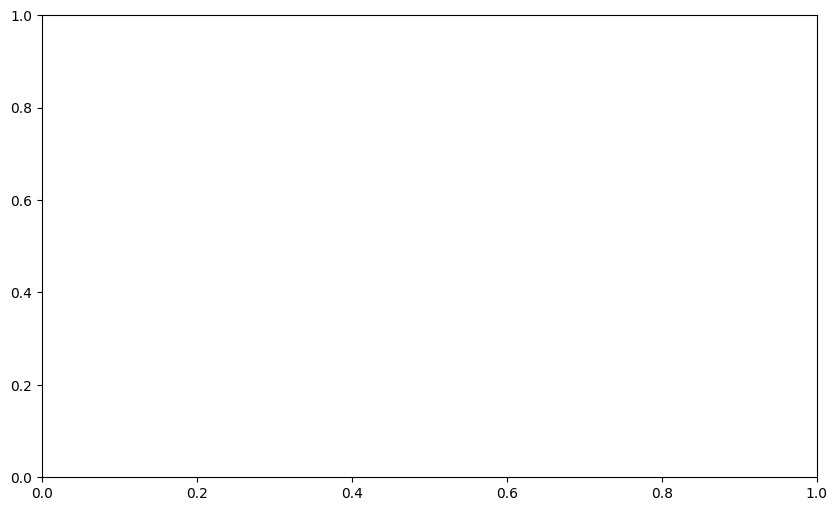

In [158]:
# EDA
plt.figure(figsize=(10, 6))
plt.plot(x = tbl_sales_item_by_month.month, y = tbl_sales_item_by_month.item_cnt_day, label = tbl_sales_item_by_month.year)

In [ ]:
tbl_sales_complete.describe()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,month,year,week_day
count,2935849,2935849.000,2935849.000,2935849.000,2935849.000,2935849.000,2935849.000,2935849.000,2935849.000,2935849.000
mean,2014-04-03 05:44:34.970681344,14.570,33.002,10197.227,890.853,1.243,40.001,6.248,2013.777,3.366
min,2013-01-01 00:00:00,0.000,0.000,0.000,-1.000,-22.000,0.000,1.000,2013.000,0.000
25%,2013-08-01 00:00:00,7.000,22.000,4476.000,249.000,1.000,28.000,3.000,2013.000,2.000
50%,2014-03-04 00:00:00,14.000,31.000,9343.000,399.000,1.000,40.000,6.000,2014.000,4.000
75%,2014-12-05 00:00:00,23.000,47.000,15684.000,999.000,1.000,55.000,9.000,2014.000,5.000
max,2015-10-31 00:00:00,33.000,59.000,22169.000,307980.000,2169.000,83.000,12.000,2015.000,6.000
std,NaN,9.423,16.227,6324.297,1729.800,2.619,17.101,3.536,0.768,1.997
